In [1]:
import pandas as pd
import seaborn as sns 
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("C:\\Users\\amjda\\Downloads\\telecom_churn.csv")

### Defining the data 

In [3]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## missing values

In [4]:
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

In [5]:
df.describe().head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


## Cleaning the data 

In [7]:
df.dropna(inplace = True) #Removing the missing values 
df2 = df.iloc[:,1:]
df2['Churn'].replace(to_replace='Yes', value=1, inplace=True)
df2['Churn'].replace(to_replace='No',  value=0, inplace=True)

df_dummies = pd.get_dummies(df2) 

In [8]:
df_dummies

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,...,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,...,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,...,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,...,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,...,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,...,0,1,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,24,84.80,1990.50,0,0,1,0,1,0,...,1,0,1,0,0,1,0,0,0,1
7039,0,72,103.20,7362.90,0,1,0,0,1,0,...,1,0,1,0,0,1,0,1,0,0
7040,0,11,29.60,346.45,0,1,0,0,1,0,...,0,1,0,0,0,1,0,0,1,0
7041,1,4,74.40,306.60,1,0,1,0,1,1,...,0,1,0,0,0,1,0,0,0,1


## Exploring the data using Correlation

<AxesSubplot:>

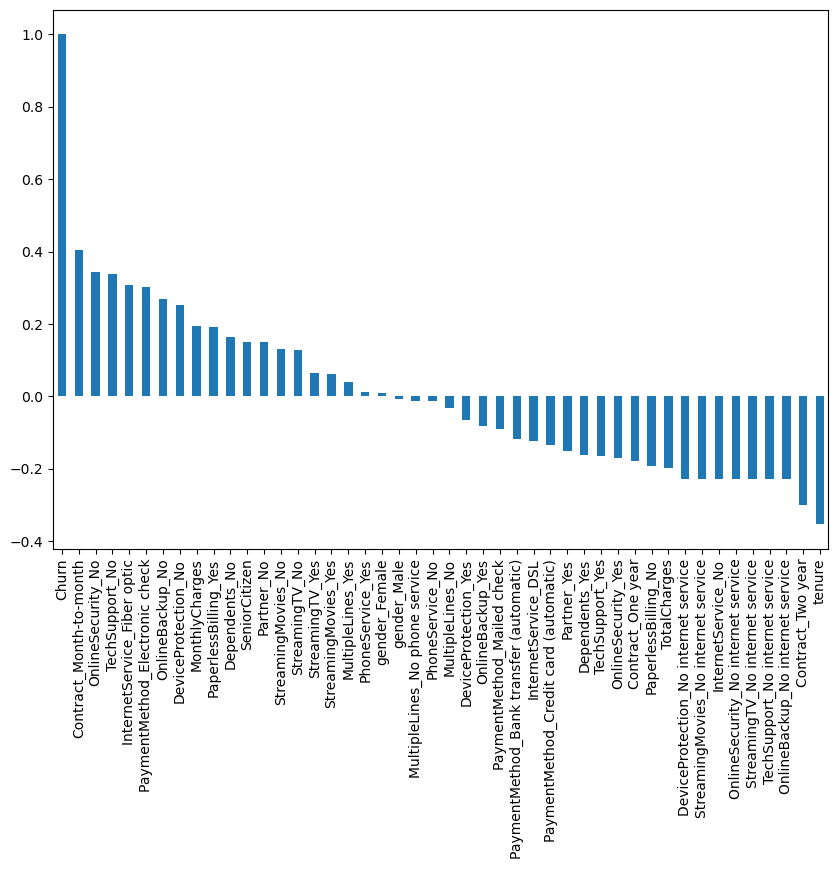

In [9]:
#Get Correlation of "Churn" with other variables:
plt.figure(figsize=(10, 7))

df_dummies.corr()['Churn'].sort_values(ascending = False).plot(kind='bar')

#As we can see Contract month to month without (OnlineSecurity, TechSupport), having a highest positive correlation with Churn  
#Tenure having highest negative correlation with Churn

## Visualization

(-1.1193818573644263,
 1.1102627542185721,
 -1.1170730613805746,
 1.1008130029228844)

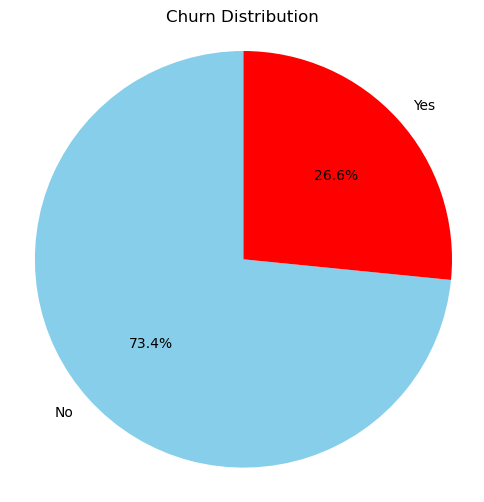

In [10]:
churn_counts = df['Churn'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = ['skyblue', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('Churn Distribution')

plt.axis('equal')

Text(0.5, 1.0, 'Count of Customers by Gender')

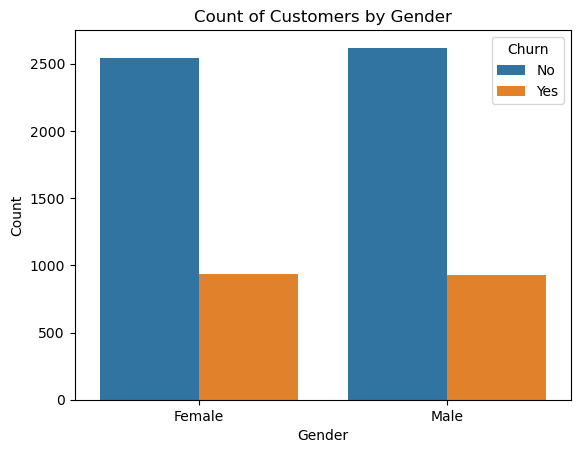

In [11]:
sns.countplot(data=df, hue='Churn', x='gender')

plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Count of Customers by Gender')

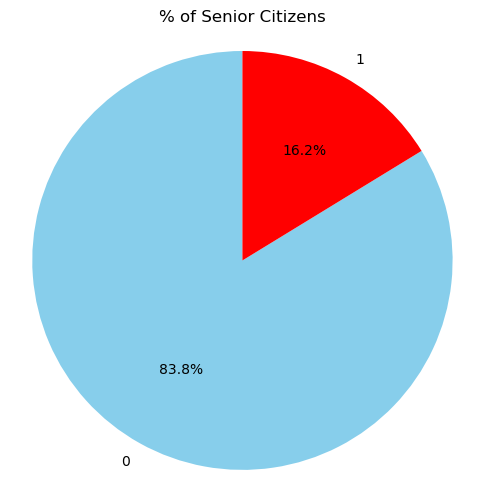

In [12]:
churn_counts = df['SeniorCitizen'].value_counts()
labels = churn_counts.index
sizes = churn_counts.values

colors = ['skyblue', 'red']

plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)

plt.title('% of Senior Citizens')

plt.axis('equal')
plt.show()

Text(0, 0.5, 'Count')

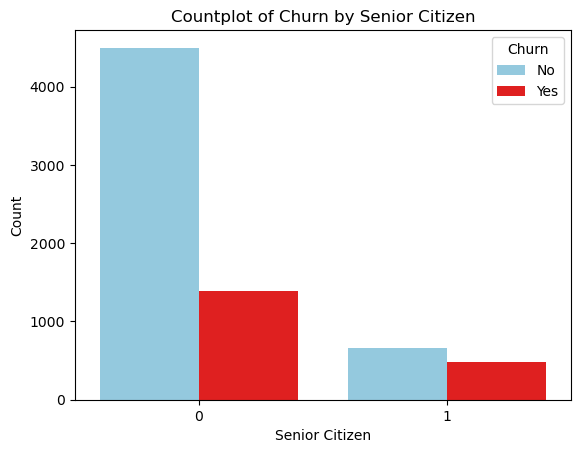

In [13]:
sns.countplot(x='SeniorCitizen', hue='Churn', data=df, palette=['skyblue', 'red'])

plt.title('Countplot of Churn by Senior Citizen')
plt.xlabel('Senior Citizen')
plt.ylabel('Count')

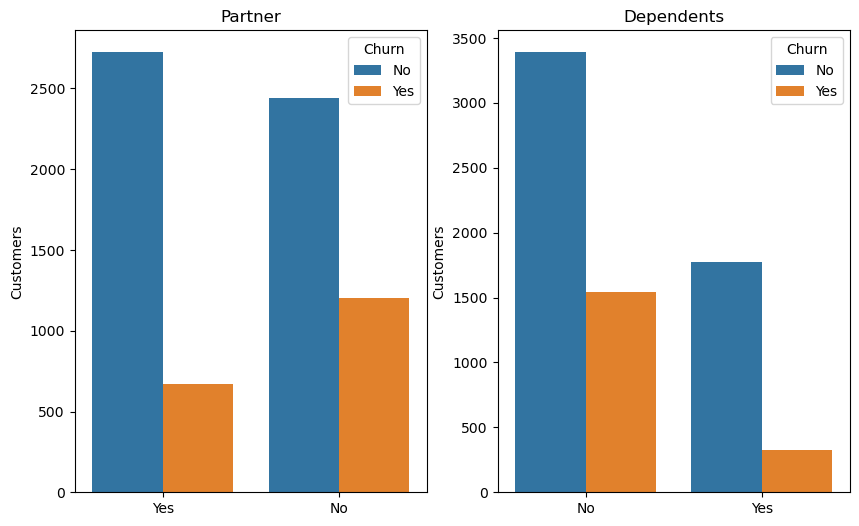

In [14]:
Customer = ['Partner', 'Dependents']

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 6))
f_axes = axes.flatten()

for i, attr in enumerate(Customer):
    sns.countplot(data=df, x=attr, hue='Churn', ax=axes[i])
    axes[i].set_title(attr)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Customers')

Text(0.5, 1.0, 'Distribution of Tenure')

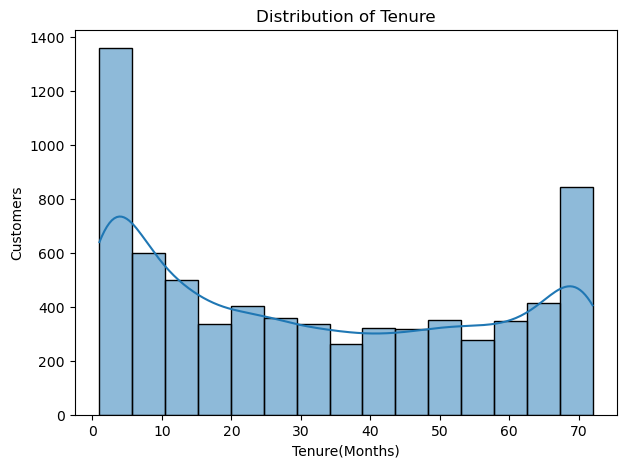

In [15]:
plt.figure(figsize=(7, 5))
sns.histplot(data=df, x='tenure', kde=True)
plt.xlabel('Tenure(Months)')
plt.ylabel('Customers')
plt.title('Distribution of Tenure')

Text(0.5, 1.0, 'Payment Method Distribution')

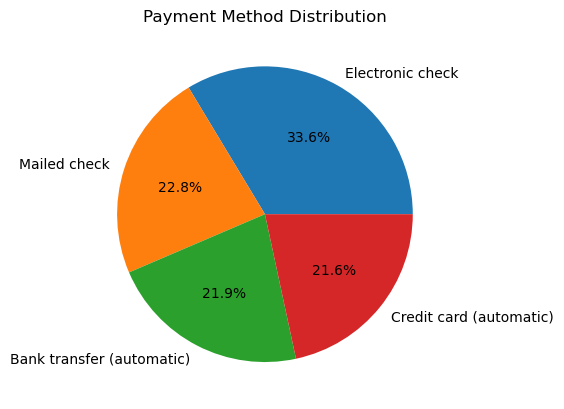

In [16]:
payment_counts = df2['PaymentMethod'].value_counts()

labels = payment_counts.index
counts = payment_counts.values

plt.pie(counts, labels=labels, autopct='%1.1f%%')
plt.title('Payment Method Distribution')

Text(0.5, 1.0, 'Churn Rate by Contract and Payment Method')

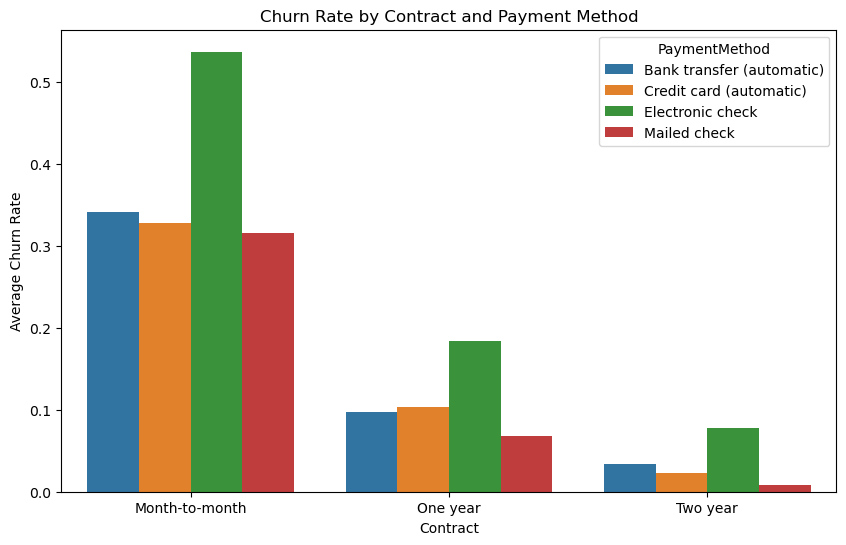

In [47]:
average_churn_rate = df2.groupby(['Contract', 'PaymentMethod'])['Churn'].mean().reset_index()

plt.figure(figsize=(10, 6))
ax = sns.barplot(data=average_churn_rate, x='Contract', y='Churn', hue='PaymentMethod')
ax.set_xlabel('Contract')
ax.set_ylabel('Average Churn Rate')
ax.set_title('Churn Rate by Contract and Payment Method')

Text(0.5, 1.0, 'Total Charges vs. Monthly Charges')

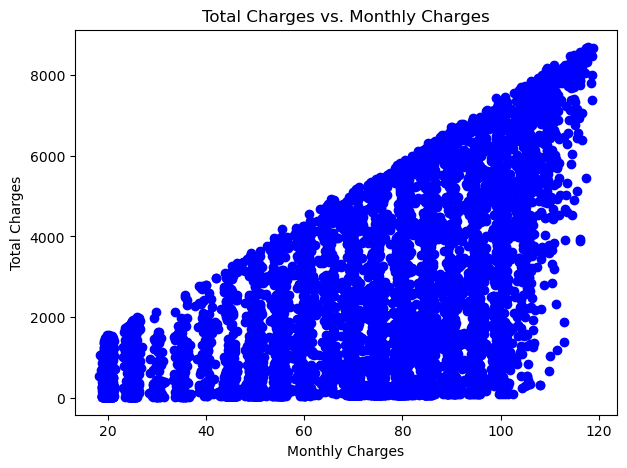

In [18]:
plt.figure(figsize=(7, 5))
plt.scatter(x=df['MonthlyCharges'], y=df['TotalCharges'], color='blue')

plt.xlabel('Monthly Charges')
plt.ylabel('Total Charges')
plt.title('Total Charges vs. Monthly Charges')

Text(0.5, 1.0, 'KDE Plot: Monthly Charges w.r.t Churn')

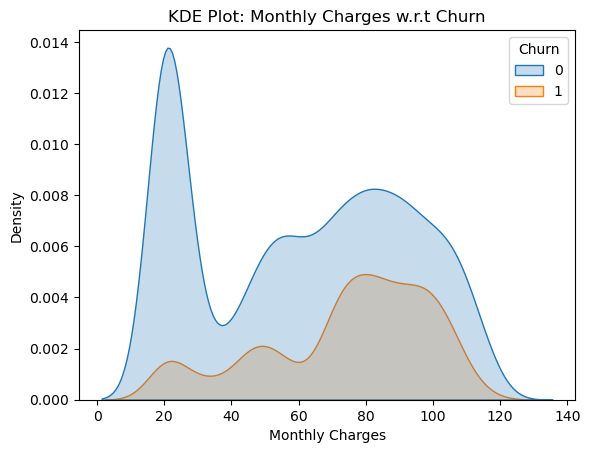

In [19]:
sns.kdeplot(data=df2, x='MonthlyCharges', hue='Churn', fill=True)

plt.xlabel('Monthly Charges')
plt.ylabel('Density')
plt.title('KDE Plot: Monthly Charges w.r.t Churn')

Text(0.5, 1.0, 'Distribution of TotalCharges w.r.t Churn')

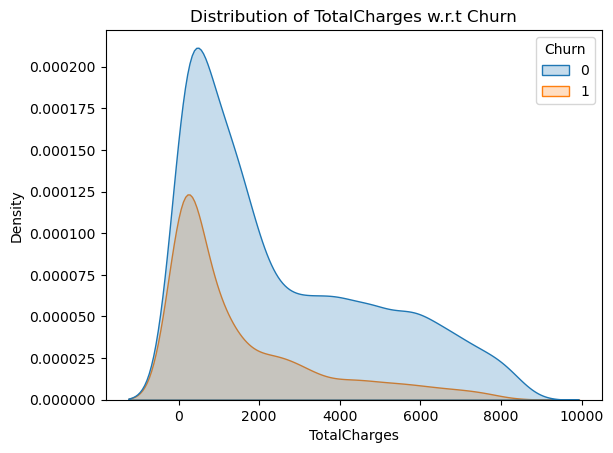

In [20]:
sns.kdeplot(data=df2, x='TotalCharges', hue='Churn', fill=True)

plt.xlabel('TotalCharges')
plt.ylabel('Density')
plt.title('Distribution of TotalCharges w.r.t Churn')

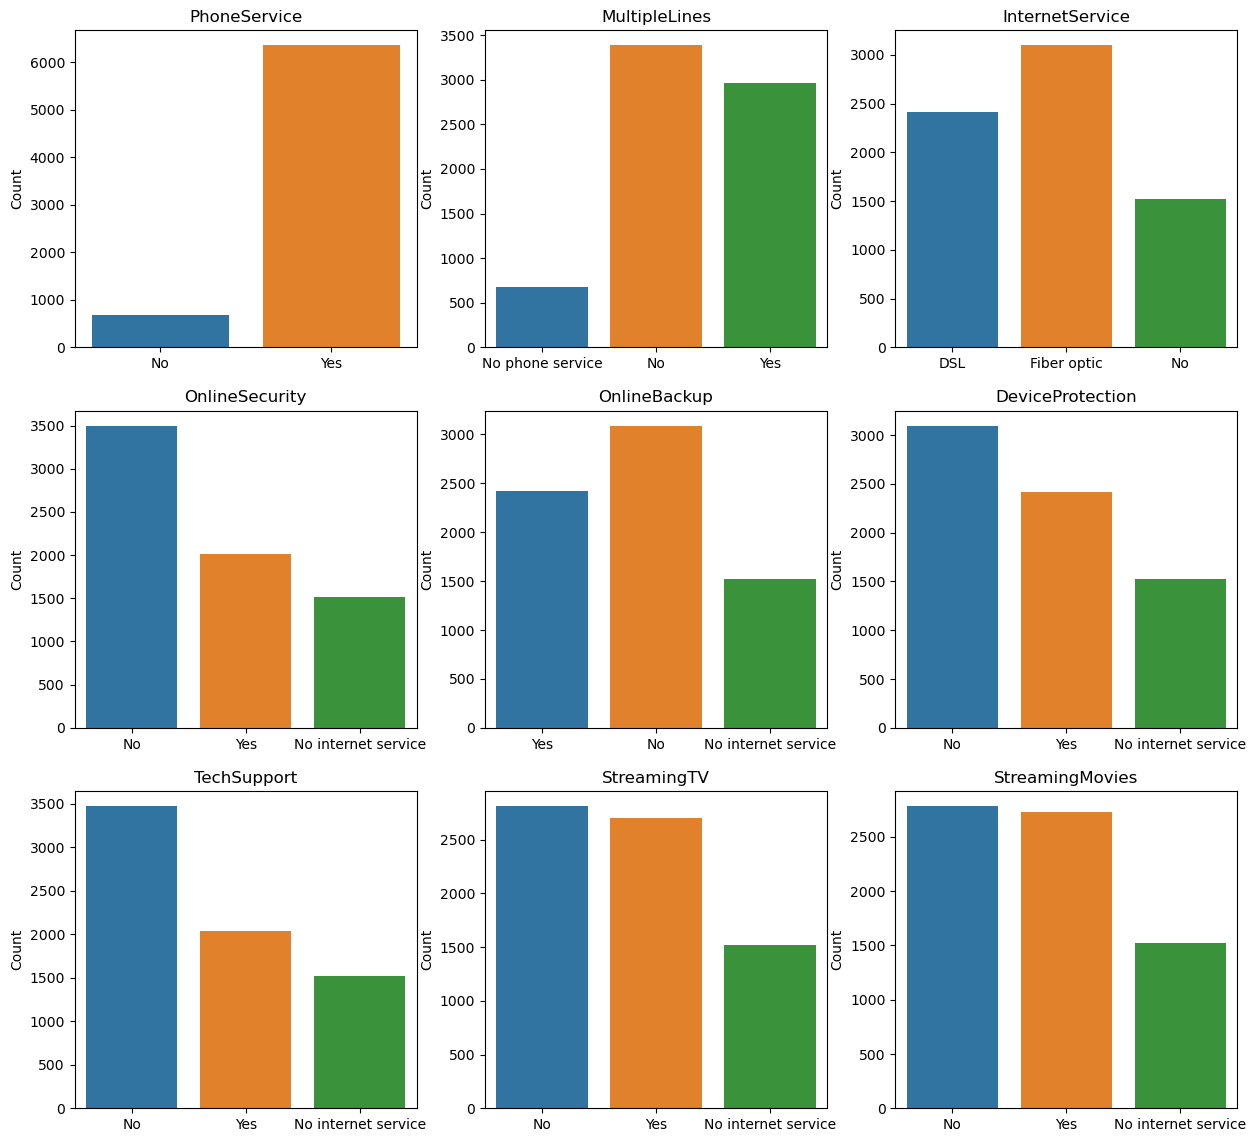

In [21]:
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 14))

axes = axes.flatten()

for i, service in enumerate(services):
    sns.countplot(data=df, x=service, ax=axes[i])
    axes[i].set_title(service)
    axes[i].set_xlabel('')
    axes[i].set_ylabel('Count')

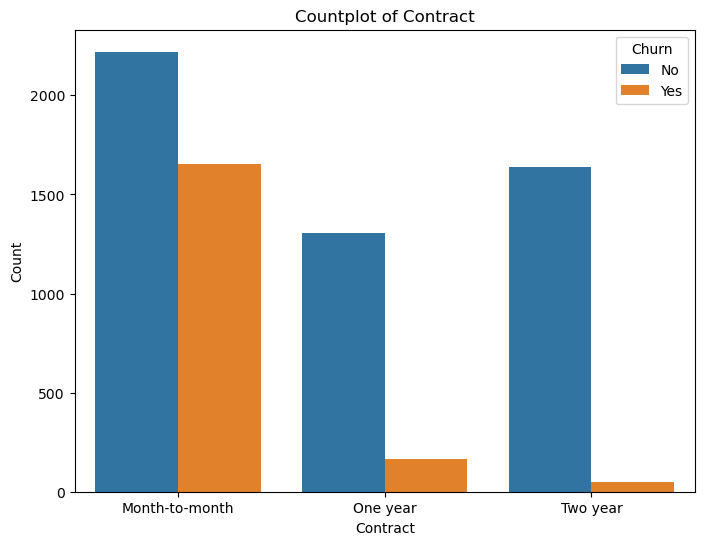

In [22]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Contract',  hue='Churn')

plt.xlabel('Contract')
plt.ylabel('Count')
plt.title('Countplot of Contract')

plt.show()

Text(0.5, 1.0, 'Two Year Contract')

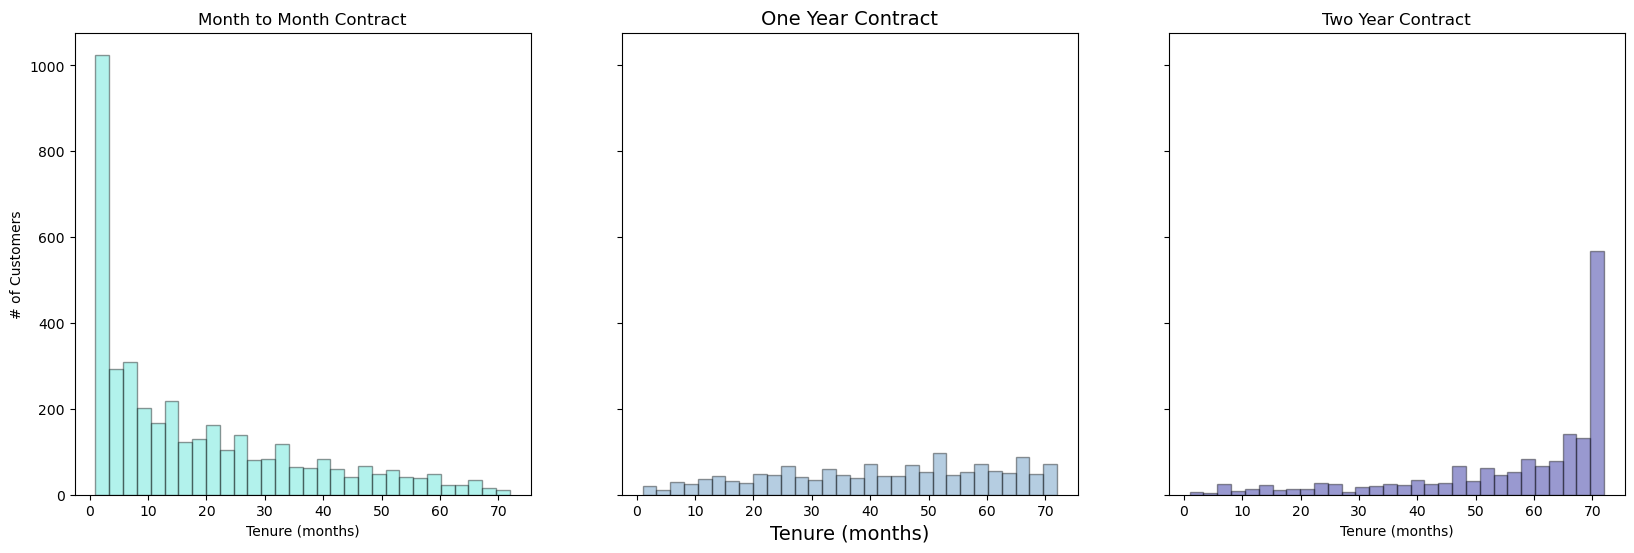

In [46]:
fig, (ax1,ax2,ax3) = plt.subplots(nrows=1, ncols=3, sharey = True,  figsize = (20,6))

ax = sns.distplot(df[df['Contract']=='Month-to-month']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'turquoise',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax1)
ax.set_ylabel('# of Customers')
ax.set_xlabel('Tenure (months)')
ax.set_title('Month to Month Contract')

ax = sns.distplot(df[df['Contract']=='One year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'steelblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax2)
ax.set_xlabel('Tenure (months)',size = 14)
ax.set_title('One Year Contract',size = 14)

ax = sns.distplot(df[df['Contract']=='Two year']['tenure'],
                   hist=True, kde=False,
                   bins=int(180/6), color = 'darkblue',
                   hist_kws={'edgecolor':'black'},
                   kde_kws={'linewidth': 4},
                 ax=ax3)

ax.set_xlabel('Tenure (months)')
ax.set_title('Two Year Contract')

#Highest number of people in contract month to month churn from 1 month to 10
##One year It's average
###Two year Contract most people churn in 70+ month
####So we should dealing with people best offers in 2 year contracts to make them stay in the longest time 

Text(0.5, 1.0, 'Tenure Distribution w.r.t Churn')

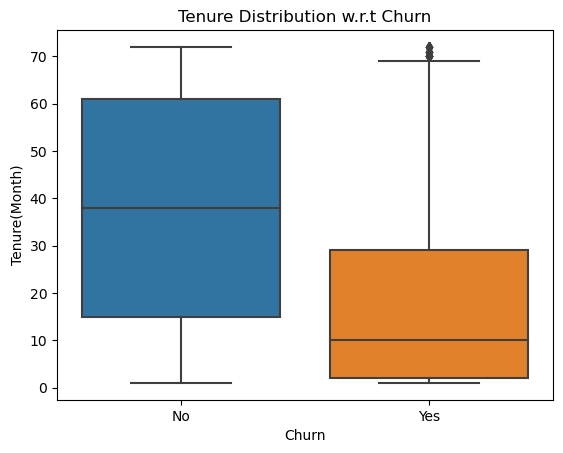

In [44]:
sns.boxplot(data=df, x='Churn', y='tenure')

plt.xlabel('Churn')
plt.ylabel('Tenure(Month)')
plt.title('Tenure Distribution w.r.t Churn')

##as we can see in the box plot the average of the people churn in 10 month

## Feature Engineering

In [25]:
X = df_dummies.drop('Churn', axis=1)
y = df_dummies['Churn']

In [26]:
from sklearn.preprocessing import MinMaxScaler
features = X.columns.values
scaler = MinMaxScaler(feature_range = (0,1))
scaler.fit(X)
X = pd.DataFrame(scaler.transform(X))
X.columns = features

##in my opinion u should do the scalar, it's going to make the predictive model give best performance 

## Spliting the data

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=15)

## Logistic Regression


In [28]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=200)
result = model.fit(X_train, y_train)

In [29]:
from sklearn import metrics

prediction_test = model.predict(X_test)

print(metrics.accuracy_score(y_test, prediction_test))

0.814498933901919


## Xgboost

In [38]:
import xgboost as xgb

model = xgb.XGBClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = metrics.accuracy_score(y_test, preds)
confusion_mat = confusion_matrix(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", confusion_mat)

Accuracy: 0.806680881307747
Confusion Matrix:
 [[931 109]
 [172 195]]


### RandomForestClassifier

In [39]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier(n_estimators=1000 , oob_score = True, n_jobs = -1,
                                  random_state =50, max_features = "auto",
                                  max_leaf_nodes = 30)
model_rf.fit(X_train, y_train)
prediction_test = model_rf.predict(X_test)

print (metrics.accuracy_score(y_test, prediction_test))

0.8038379530916845


<AxesSubplot:>

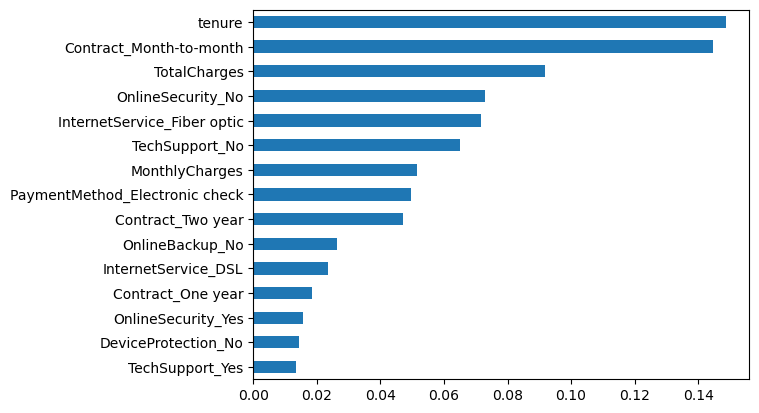

In [40]:
importances = model_rf.feature_importances_

val = pd.Series(importances,
                 index=X.columns.values)
val.sort_values()[-15:].plot(kind = 'barh')

## After using RF, now we can see the importants in the model (tenure and contract_month-to-month)

In [41]:
from sklearn.svm import SVC

model.svm = SVC(kernel='linear') 
model.svm.fit(X_train,y_train)
preds = model.svm.predict(X_test)

metrics.accuracy_score(y_test, preds)

0.806680881307747

In [42]:
from sklearn.metrics import classification_report, confusion_matrix  

print(confusion_matrix(y_test,preds))  

[[947  93]
 [179 188]]
